## churn analysis for EDA project

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [24]:
df=pd.read_csv('Bank Customer Churn Prediction.csv')

### finding the shape of the data

In [25]:
df.shape

(10000, 12)

### printing the columns and top 5 from the dataset

In [26]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [4]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### finding information about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [40]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [41]:
print(df.nunique())

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64


### making a correlation matrix to display the relationships between columns

In [29]:
df = pd.DataFrame(df)

correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                  customer_id  credit_score       age    tenure   balance  \
customer_id          1.000000      0.005308  0.009497 -0.014883 -0.012419   
credit_score         0.005308      1.000000 -0.003965  0.000842  0.006268   
age                  0.009497     -0.003965  1.000000 -0.009997  0.028308   
tenure              -0.014883      0.000842 -0.009997  1.000000 -0.012254   
balance             -0.012419      0.006268  0.028308 -0.012254  1.000000   
products_number      0.016972      0.012238 -0.030680  0.013444 -0.304180   
credit_card         -0.014025     -0.005458 -0.011721  0.022583 -0.014858   
active_member        0.001665      0.025651  0.085472 -0.028362 -0.010084   
estimated_salary     0.015271     -0.001384 -0.007201  0.007784  0.012797   
churn               -0.006248     -0.027094  0.285323 -0.014001  0.118533   

                  products_number  credit_card  active_member  \
customer_id              0.016972    -0.014025       0.001665   
cr

### Dropping customer_id because it is not needed for interpretation

In [8]:
df=df.drop("customer_id",axis=1)
df.head(3)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


### printing categorical and numerical variables

In [10]:
print('Categoric Values Unique Values:')
for col in df.select_dtypes(include = [object]):
    print(col, ':', df[col].unique())

Categoric Values Unique Values:
country : ['France' 'Spain' 'Germany']
gender : ['Female' 'Male']


In [11]:
num_cols = [column for column in df.columns if df.dtypes[column] == 'int64']
num_cols1 = [column for column in df.columns if df.dtypes[column] == 'float64']

cat_cols = [column for column in df.columns if df.dtypes[column] == "object"]

print("Numerical Variables : " + str(num_cols + num_cols1))
print("Categoric Variables : " + str(cat_cols))

Numerical Variables : ['credit_score', 'age', 'tenure', 'products_number', 'credit_card', 'active_member', 'churn', 'balance', 'estimated_salary']
Categoric Variables : ['country', 'gender']


### Histogram for gender

<AxesSubplot:xlabel='gender', ylabel='Count'>

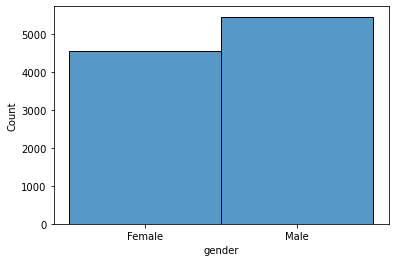

In [12]:
sns.histplot(df['gender'])

### Histogram for age

<AxesSubplot:xlabel='age', ylabel='Count'>

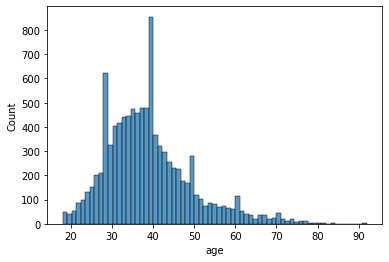

In [13]:
sns.histplot(df['age'])

### looking at the gender column it says female and male
### - making the gender column binary
### - female 0, male 1

In [14]:
df['gender'] = df['gender']\
.str.replace('Female','0')\
.str.replace('Male','1')\
.astype('int64')

In [15]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


### visualizing the distributions of numerical features

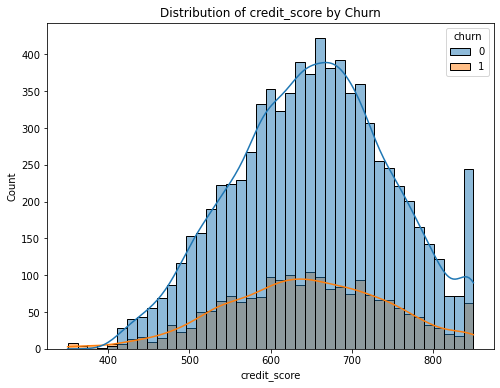

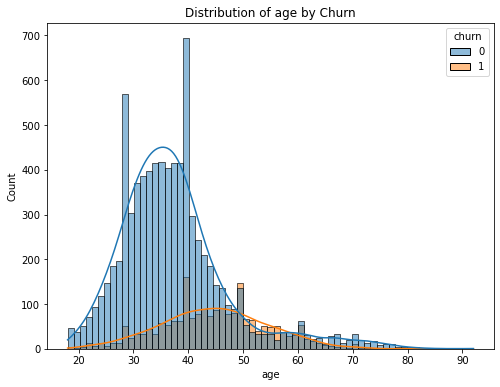

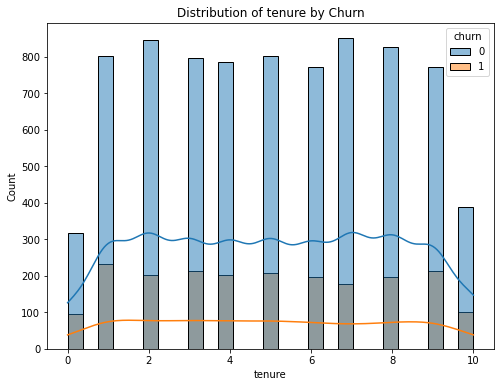

In [17]:
numerical_features = ["credit_score", "age", "tenure"]
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue="churn", kde=True)
    plt.title(f"Distribution of {feature} by Churn")
    plt.show()

### the distribution by gender
### - credit_card
### - churn

In [18]:
df.gender.groupby(df.gender).count()

gender
0    4543
1    5457
Name: gender, dtype: int64

In [19]:
df.credit_card.groupby(df.credit_card).count()

credit_card
0    2945
1    7055
Name: credit_card, dtype: int64

In [20]:
df.churn.groupby(df.churn).count()

churn
0    7963
1    2037
Name: churn, dtype: int64

### Value counts for country

In [21]:
df = df['country'].value_counts() 
print(df) 

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64


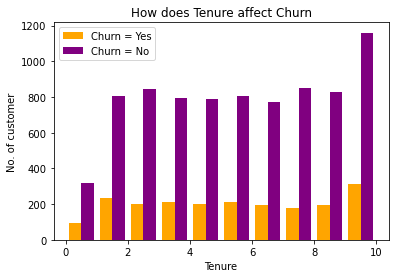

In [32]:
#--How does Tenure affect Churn
tenure_yes = df[df['churn'] == 1].tenure
tenure_no = df[df['churn'] == 0].tenure

plt.hist([tenure_yes,tenure_no], color =['orange','purple'], label=['Churn = Yes','Churn = No'])
plt.legend()
plt.title('How does Tenure affect Churn')
plt.xlabel('Tenure')
plt.ylabel('No. of customer')
plt.show()

<AxesSubplot:>

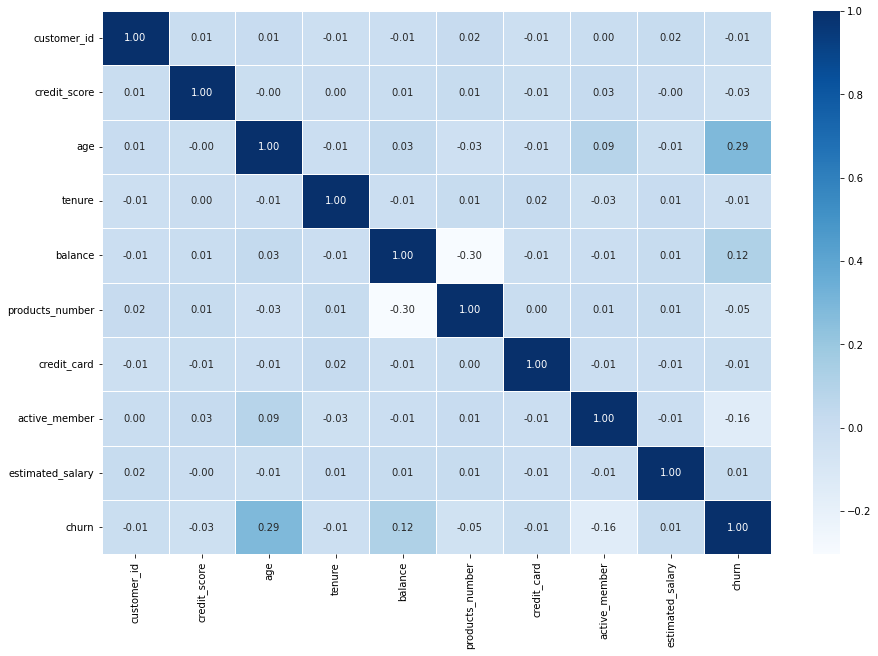

In [33]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5, fmt='.2f')

<AxesSubplot:>

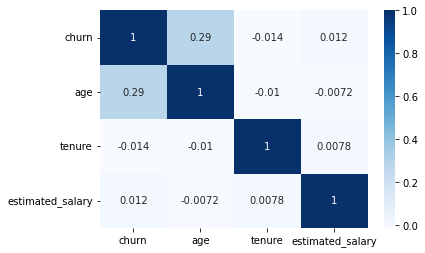

In [39]:
sns.heatmap(df[['churn', 'age','gender','country', 'tenure','estimated_salary']].corr(), annot=True, cmap='Blues')

<AxesSubplot:xlabel='credit_score', ylabel='age'>

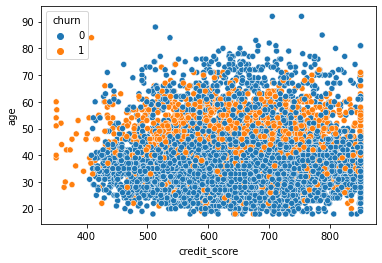

In [34]:
sns.scatterplot(x='credit_score', y='age', hue='churn', data=df)

<AxesSubplot:xlabel='balance', ylabel='age'>

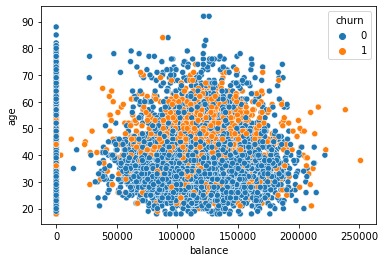

In [35]:
sns.scatterplot(x='balance', y='age', hue='churn', data=df)

<AxesSubplot:xlabel='estimated_salary', ylabel='balance'>

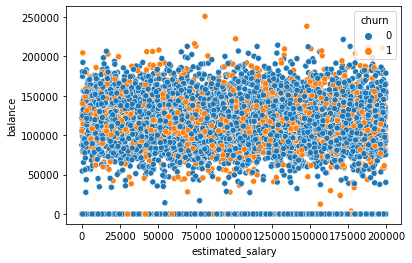

In [36]:
sns.scatterplot(x='estimated_salary', y='balance', hue='churn', data=df)

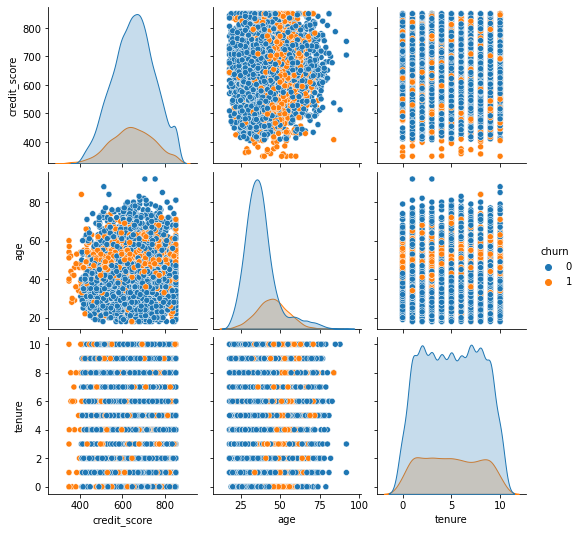

In [37]:
# Analyzing the relationships between numerical features and churn status
numerical_features.append("churn")
sns.pairplot(data=df[numerical_features], hue="churn")

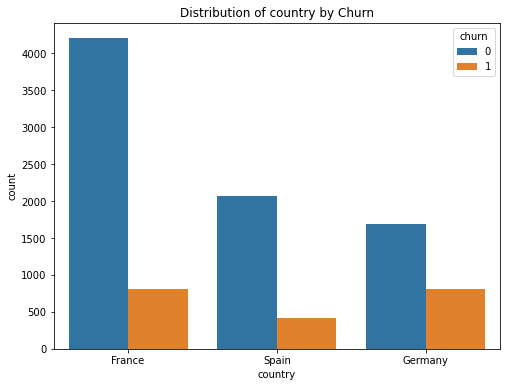

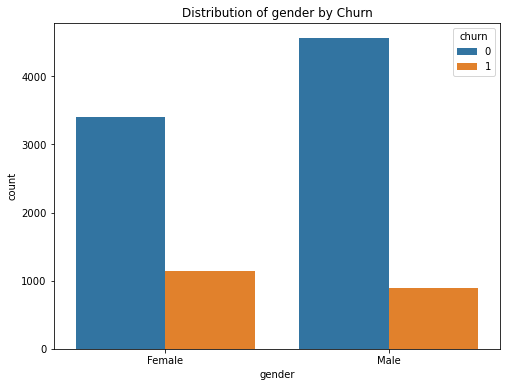

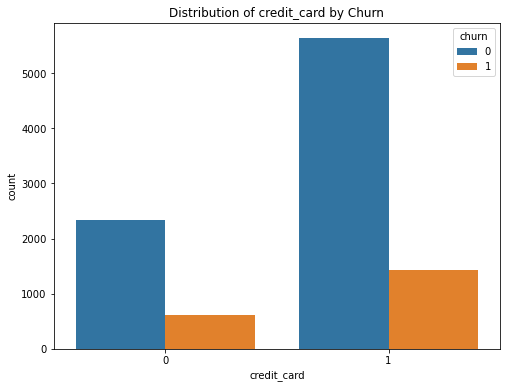

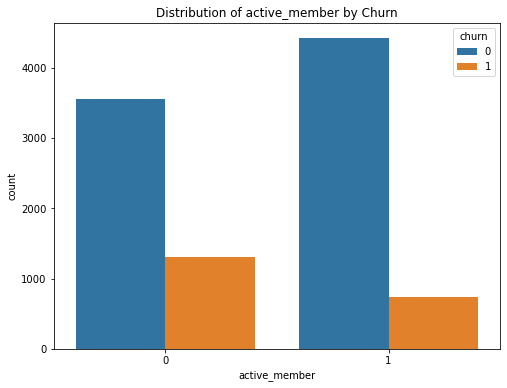

In [38]:
# Exploring the distributions of categorical features
categorical_features = ["country", "gender", "credit_card", "active_member"]
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature, hue="churn")
    plt.title(f"Distribution of {feature} by Churn")
    plt.show()
